# Almost pairs trading

This little exercise goes back to an idea by Stephen Boyd:

The simulator should always be completely agnostic as to the trading policy.
You should even demonstrate this with silly policies.
Like here’s one:  Each day choose names from the universe at random.
Buy one (say 0.1 of your portfolio wealth) and short one the same amount.
Not a good strategy, but a valid one.
Of course the simulate will terminate if you go bust (which seems likely).

In [17]:
import numpy as np
import pandas as pd
from loguru import logger

from cvx.simulator.builder import Builder

pd.options.plotting.backend = "plotly"

# Get rid of findfont: Font family 'Arial' not found.
# when running a remote notebook on Jupyter Server on Ubuntu Linux server
import logging
logging.getLogger("matplotlib.font_manager").setLevel(logging.ERROR)

In [24]:
logger.info("Load prices")
prices = pd.read_csv("data/stock-prices.csv", index_col=0, parse_dates=True, header=0)

logger.info("Build portfolio")
b = Builder(prices=prices, initial_cash=1e6)

for t, state in b:
    #print(state.nav)
    assert state.nav > 0, "Game over"
    
    # pick two assets at random
    pair = np.random.choice(state.assets, 2, replace=False)
    
    # compute the pair
    units = pd.Series(index=state.assets, data=0.0)
    units[pair] = [state.nav, -state.nav] / state.prices[pair].values    
    b.position = 0.1*units

    # 1 bps of the traded volume (measured in USD) are paid as fee
    state.cash -= 0.0001 * (state.trades.abs() * state.prices).sum()

portfolio = b.build()

2023-12-15 20:18:47.974 | INFO     | __main__:<module>:1 - Load prices
2023-12-15 20:18:48.006 | INFO     | __main__:<module>:4 - Build portfolio


In [25]:
portfolio = b.build()

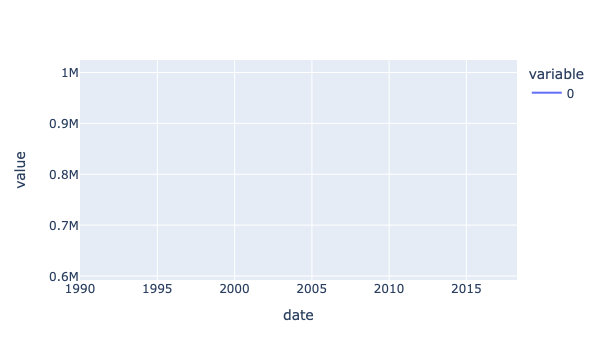

In [26]:
portfolio.nav.plot()